In [39]:
import shap
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

In [40]:
# Carregando o conjunto de dados
data = load_breast_cancer()
X, y = data['data'], data['target']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [41]:
# Avaliando o modelo
predição_teste = model.predict(X_test)
print('Precisão:', precision_score(y_test, predição_teste))
print('Recall:', recall_score(y_test, predição_teste))
print('Acurácia:', accuracy_score(y_test, predição_teste))


Precisão: 0.958904109589041
Recall: 0.9859154929577465
Acurácia: 0.9649122807017544


Tipo de shap_values: <class 'numpy.ndarray'>
Quantidade de entradas em shap_values: 114
Forma de shap_values para cada classe:
Classe 0: (30, 2)
Classe 1: (30, 2)
Classe 2: (30, 2)
Classe 3: (30, 2)
Classe 4: (30, 2)
Classe 5: (30, 2)
Classe 6: (30, 2)
Classe 7: (30, 2)
Classe 8: (30, 2)
Classe 9: (30, 2)
Classe 10: (30, 2)
Classe 11: (30, 2)
Classe 12: (30, 2)
Classe 13: (30, 2)
Classe 14: (30, 2)
Classe 15: (30, 2)
Classe 16: (30, 2)
Classe 17: (30, 2)
Classe 18: (30, 2)
Classe 19: (30, 2)
Classe 20: (30, 2)
Classe 21: (30, 2)
Classe 22: (30, 2)
Classe 23: (30, 2)
Classe 24: (30, 2)
Classe 25: (30, 2)
Classe 26: (30, 2)
Classe 27: (30, 2)
Classe 28: (30, 2)
Classe 29: (30, 2)
Classe 30: (30, 2)
Classe 31: (30, 2)
Classe 32: (30, 2)
Classe 33: (30, 2)
Classe 34: (30, 2)
Classe 35: (30, 2)
Classe 36: (30, 2)
Classe 37: (30, 2)
Classe 38: (30, 2)
Classe 39: (30, 2)
Classe 40: (30, 2)
Classe 41: (30, 2)
Classe 42: (30, 2)
Classe 43: (30, 2)
Classe 44: (30, 2)
Classe 45: (30, 2)
Classe 46

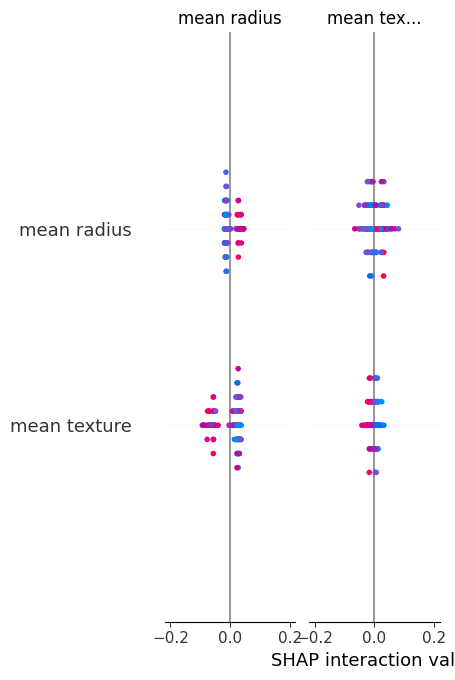

In [42]:
# Explicando o modelo com SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Verifique a estrutura de shap_values
print(f"Tipo de shap_values: {type(shap_values)}")
print(f"Quantidade de entradas em shap_values: {len(shap_values)}")
print(f"Forma de shap_values para cada classe:")
for i, shap_val in enumerate(shap_values):
    print(f"Classe {i}: {shap_val.shape}")

# Se `shap_values` é uma lista de matrizes, use a matriz da classe positiva (classe 1)
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap.summary_plot(shap_values[1], X_test, feature_names=data['feature_names'])
else:
    # Se `shap_values` não é uma lista ou contém mais de duas classes
    shap.summary_plot(shap_values, X_test, feature_names=data['feature_names'])

Importância das features:
mean radius: 0.0122
mean texture: 0.0122


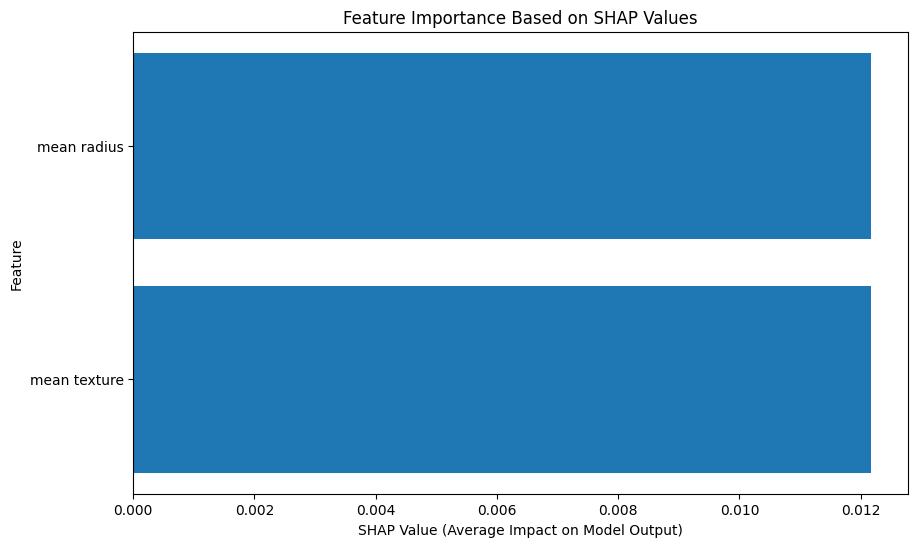

In [43]:
# Calcule a importância das features
feature_names = data['feature_names']
feature_importance = list(zip(feature_names, mean_abs_shap_values))

# Ordene a importância das features
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

print("Importância das features:")
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.4f}')

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance])
plt.xlabel("SHAP Value (Average Impact on Model Output)")
plt.ylabel("Feature")
plt.title("Feature Importance Based on SHAP Values")
plt.gca().invert_yaxis()
plt.show()
